# Coursework 2 - ECMM445 Learning from Data

### Candidate number: 087074

# Task 1: KNN

In [1]:
# Import the appropriate packages into Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import sklearn

# Task 1
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #

# Task 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings # Because a warning occurs for the neural network - "optimum not reached adter 200 iterations"
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Load the diabetes database, break it down into source and target variables and normalise the source variables

task1_diabetes = pd.read_csv("task1_diabetes.txt") 
source = task1_diabetes.iloc[:,:-1] 
normalised_source = source.copy() # Normalise the source variables using Min-Max scalar
scaler = MinMaxScaler()
normalised_source[:] = scaler.fit_transform(normalised_source[:])

target = task1_diabetes.iloc[:,-1:] 
y_train = target['class'].to_list()

normalised_data = normalised_source.copy() # Create a normalised dataset with source and target variables
normalised_data['class'] = target

In [3]:
# A function that calculates the Euclidean distance between two points based on the values 
# of three random characteristics

def distance_cw2(x,y): 
    m = 3 # As required, m = 3
    total = 0
    char_compared = [] # Ensure that the same characteristic isn't compared twice
    for i in range(0,m): 
        random_char = random.randint(0,(len(x)-1))
        while random_char in char_compared:
            random_char = random.randint(0,(len(x)-1))
        char_compared.append(random_char)
        total += (x[random_char]-y[random_char])**2
    Euclidean = math.sqrt(total)
    return(Euclidean) 

In [4]:
# A function that, using the input of a distance metric and the number of nearest neighbours, 
# trains a K Nearest Neighbor using 10-fold validation. The ouput is the average mean and average standard deviation
# of the accuracy from the 10-fold validation.

def KNN(user_metric, k):
    acc_scores = []
    X = normalised_data.copy() 
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X): # Iterate over each fold
        # Create appropriate train and test sets
        X_train, X_test = normalised_source.iloc[train_index], normalised_source.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        y_train_copy = y_train['class'].to_list()
        y_test_copy = y_test['class'].to_list()
        
        # Apply the K Nearest Neighbor algorithm
        knn = KNeighborsClassifier(n_neighbors=k, metric=user_metric)
        knn.fit(X_train, y_train_copy)
        y_predict = knn.predict(X_test)
        ACC = accuracy_score(y_test_copy, y_predict)
        acc_scores.append(ACC) # Append the accuracy of that fold 
    # Get the average accuracy and standard deviation
    mean_acc = np.mean(acc_scores)
    std_acc = np.std(acc_scores)
    return mean_acc, std_acc

In [5]:
# This creates a dataframe with the average mean ± standard deviation of the accuracy of each distance metric 
# for k = 1,3,5,7

k_list = [1,3,5,7]
columns = ['Distance_cw2', 'Euclidean', 'Manhattan', 'Chebyshev']
dataframe_accuracy = pd.DataFrame(index=k_list, columns=columns)
dataframe_accuracy['k'] = k_list
dataframe_accuracy.set_index('k', inplace=True)
mean_accuracies_d = []
mean_accuracies_e = []
mean_accuracies_m = []
mean_accuracies_c = []

for k in k_list:
    random.seed(k) # Set random seed to ensure the reproducability of results
    mean_acc_d, std_acc_d = KNN(distance_cw2, k)
    mean_acc_e, std_acc_e = KNN('euclidean', k) # Applying the KNN function for each distance metric and k
    mean_acc_m, std_acc_m = KNN('manhattan', k)
    mean_acc_c, std_acc_c = KNN('chebyshev', k)
    
    mean_std_d = str(mean_acc_d.round(2)) + '±' + str(std_acc_d.round(2)) # Round to 2dp for better data 
    mean_std_e = str(mean_acc_e.round(2)) + '±' + str(std_acc_e.round(2)) # visualisation
    mean_std_m = str(mean_acc_m.round(2)) + '±' + str(std_acc_m.round(2))
    mean_std_c = str(mean_acc_c.round(2)) + '±' + str(std_acc_c.round(2))
    mean_stds = [mean_std_d, mean_std_e, mean_std_m, mean_std_c]
    dataframe_accuracy.loc[k] = mean_stds
    
    # Store data in lists so a graph can be plotted
    mean_accuracies_d.append(mean_acc_d)
    mean_accuracies_e.append(mean_acc_e)
    mean_accuracies_m.append(mean_acc_m)
    mean_accuracies_c.append(mean_acc_c)

dataframe_accuracy

,Distance_cw2,Euclidean,Manhattan,Chebyshev
k,,,,
1,0.61±0.06,0.7±0.06,0.7±0.06,0.69±0.07
3,0.66±0.05,0.74±0.05,0.73±0.05,0.73±0.05
5,0.68±0.05,0.74±0.06,0.74±0.05,0.72±0.04
7,0.67±0.05,0.75±0.06,0.73±0.05,0.73±0.06


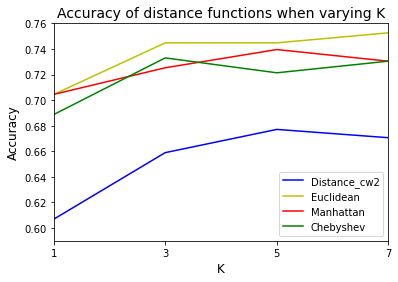

In [6]:
# Create a plot of the accuracy of each distance metric when varying the K values

# Create the graph with suitable axes and labels
plt.title("Accuracy of distance functions when varying K", fontsize=14)
plt.xlabel("K", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(1, 8, step=2))
axes = plt.gca()
axes.set_xlim([1,7])
axes.set_ylim([0.59,0.76])

plt.plot(k_list,mean_accuracies_d, "-b", label="Distance_cw2") # Plot the values for each distance metric
plt.plot(k_list,mean_accuracies_e, "-y", label="Euclidean")
plt.plot(k_list,mean_accuracies_m, "-r", label="Manhattan")
plt.plot(k_list,mean_accuracies_c, "-g", label="Chebyshev")
plt.legend(loc="lower right") # Set legend to bottom right
plt.show()

# Task 2: Impact of Noise

In [7]:
# Load the training set, break it down into source and target variables and normalise the source variables

task2_train = pd.read_csv("task2_train.txt")

scaler = MinMaxScaler() # Use Min-Max technique
source_train = task2_train.iloc[:,:-1]
normalised_source_train = source_train.copy()
normalised_source_train[:] = scaler.fit_transform(normalised_source_train[:])

target_train = task2_train.iloc[:,-1:] 
y_train = target_train['class'].to_list()

In [8]:
# Load the testing set, break it down into source and target variables and normalise the source variables
task2_test = pd.read_csv("task2_test.txt")  

source_test = task2_test.iloc[:,:-1]
normalised_source_test = source_test.copy()
normalised_source_test[:] = scaler.fit_transform(normalised_source_test[:])

target_test = task2_test.iloc[:,-1:] 
y_test = target_test['class'].to_list()

In [9]:
# A function that requires the input of the target values of a dataset and the noise to be added.
# The specified percentage of noise is then added and the noisy dataset is outputted.

def add_noise(target, percent):
    noisy_target = target.copy()
    table_length = len(noisy_target['class'])
    one_percent = math.floor(table_length/100) # Calculate the number of targets that need to be changed
    num_of_rows = one_percent*percent
    random_rows = []
    for i in range(0, num_of_rows):
        random_row = random.randint(0,table_length-1)
        if noisy_target.loc[random_row,'class'] == 1: # Ensure the same target isn't changed twice
            noisy_target.loc[random_row,'class'] = 0
        else:
            noisy_target.loc[random_row,'class'] = 1
    return(noisy_target)

In [ ]:
# This trains three different models on the noisy datasets (ranging from 0%-30% noise) and calculates 
# their accuracy at predicting the results of the test set. For each noise level, this is repeated 50
# times and the average accuracy is taken. 

accuracy_NN = [] # Creat empty lists that store the accuracy of each method for different noise levels
accuracy_KNN = []
accuracy_DT = []
noise = []

for i in range(0,30,2): # Iterate from 0%-30% of noise
    acccuracy_of_NN = [] # Create empty lists to store the 50 iterations for each noise level.
    acccuracy_of_KNN = [] # The average will be taken
    acccuracy_of_DT = []
    for h in range(0,50):
        random.seed(h) # Set random seed equal to h to ensure reporoducability
        noisy_target = add_noise(target_train,i) 
        y_train = noisy_target['class'].to_list() 
        
        Neural_network = MLPClassifier(hidden_layer_sizes=(8,3), random_state=20)
        Neural_network.fit(normalised_source_train, y_train) # Train a neural network to the noisy data
        y_predict_NN = Neural_network.predict(normalised_source_test)
        ACC_NN = accuracy_score(y_predict_NN,y_test)
        acccuracy_of_NN.append(ACC_NN) # Store the accuracy
        
        knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
        knn.fit(normalised_source_train, y_train) # Train a K nearest neighbor model
        y_predict_KNN = knn.predict(normalised_source_test)
        ACC_KNN = accuracy_score(y_predict_KNN,y_test)
        acccuracy_of_KNN.append(ACC_KNN)
        
        DT_model = DecisionTreeClassifier(max_depth = 2) # Set max_depth to 2 as this produces the best results
        DT_model = DT_model.fit(normalised_source_train, y_train) # Train a decision tree model
        y_predict_DT = DT_model.predict(normalised_source_test)
        ACC_DT = accuracy_score(y_predict_DT,y_test)
        acccuracy_of_DT.append(ACC_DT)
        
    accuracy_NN.append(np.mean(acccuracy_of_NN)) # Take the average accuracy over the 50 iterations
    accuracy_KNN.append(np.mean(acccuracy_of_KNN)) # for each model.
    accuracy_DT.append(np.mean(acccuracy_of_DT))
    noise.append(i)

In [ ]:
# Plot the accuracy of the models for different noise levels

plt.title("Accuracy of different classifiers when varying the level of noise", fontsize=14)
plt.xlabel("Noise (%)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0.58,0.75])

plt.plot(noise, accuracy_NN, "-b", label="Neural Network")
plt.plot(noise, accuracy_KNN, "-g", label="K Nearest Neighbor")
plt.plot(noise, accuracy_DT,  "-r", label="Decision Tree")
plt.legend(loc="top right") # Set legend to bottom right
plt.show()

   # Task 3: Reflection

### Task 1
Task 1 is to analyse the performance of the K Nearest Neighbour (KNN) classification algorithm on the “diabetes.txt” dataset using different distance metrics and values of k. I made the distance metric “distance_cw2” that calculates the Euclidean distance between two observations based on three randomly chosen characteristics. The distance_cw2 metric and the built-in “Euclidean”, “Manhattan” and “Chebyshev” metrics were used to train and test a KNN model on the dataset using the 10-fold validation method. The performance of these different metrics was analysed when the number of nearest neighbours, k, was varied over values 1, 3, 5, 7.

The built-in functions all increased in accuracy from around 0.70 to 0.74 as k increased, whereas distance_cw2 increased in accuracy from 0.61 to 0.67. Therefore, the experiment showed that the built-in Euclidean, Manhattan and Chebyshev metrics are more effective than the handmade distance_cw2 metric.

The experiment could be improved by calculating the run time of the KNN algorithm when using the different metrics. Therefore, we could see if the better performance of different metrics is at the expense of higher computation levels. 

### Task 2
Task 2 is to compare the performance of K Nearest Neighbour (KNN), Decision Tree (DT) and Neural Network (NN) classification models when trained on a noisy dataset. To do this, the level of noise in the “task2_train.txt” was increased from 0% to 30% and the KNN, DT and NN models were trained on the dataset at each level of noise. Their ability to accurately predict the classifications of the test dataset, “task2_test.txt” was then measured. This was repeated 50 times to get the average accuracy of each model at each noise level. 

At a level of 0% noise, the NN has a 73% accuracy rate, the DT a 68% accuracy rate and the KNN a 66% accuracy rate. As the level of noise increased, the accuracy of all three models reduced by around 5%. Overall, the NN outperformed the other two models by 5%, proving it to be the best classifier model in this scenario. 

Currently, the performance of models is only being analysed using pre-determined parameters. The value of these parameters is very important and can massively affect the performance of the models. Therefore, to improve the experiment, the parameters of the models could be varied to determine the parameters that maximise their model’s performance levels. These parameters could then be used in the experiment. 
